# GROUP 6 MINERALOGY

### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'E:\\ANACONDA\\envs\\capstone project'

In [3]:
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)
val = pd.read_csv('val.csv', header=0)

In [6]:
len(train)

1289841

In [5]:
train.head(5)

,Index,x,y,Ag_counts,Al_counts,As_counts,Au_counts,Ba_counts,Bi_counts,Ca_counts,...,Ti_counts,Tl_counts,U_counts,V_counts,W_counts,Y_counts,Zn_counts,Zr_counts,z,Mineralogy
0,1091007,16000,2400,0.5,20.0,0.5,2.0,0.5,13.0,247.0,...,2162.0,0.5,4.0,140.0,13.0,12.0,0.5,12.0,3600.0,Ilmenite
1,1027436,43600,24400,0.5,0.5,0.5,0.5,0.5,6.0,2.0,...,271.0,8.0,9.0,11.0,0.5,0.5,0.5,11.0,5400.0,Ilmenite
2,1509293,3400,3400,1.0,2.0,0.5,0.5,0.5,0.5,16.0,...,3605.0,0.5,0.5,220.0,30.0,0.5,16.0,7.0,8400.0,Rutile
3,793374,15000,1600,9.0,0.5,0.5,18.0,0.5,14.0,8.0,...,20.0,15.0,16.0,0.5,0.5,0.5,0.5,0.5,12000.0,Fe oxide
4,813186,23000,22000,0.5,12.0,0.5,5.0,9.0,6.0,328.0,...,69.0,0.5,6.0,6.0,0.5,0.5,0.5,0.5,10000.0,Epidote


In [8]:
pd.DataFrame(train['Mineralogy'].unique())

# Mineralogy to investigate

# YFe-silicate -- this doesn't exist according to google, typo for Fe-silicate??
# NaN -- missing values
# Zn_Fe_Al_silicate? -- classification has a question mark, reliability of using an uncertain classification? Something to consider

,0
0,Ilmenite
1,Rutile
2,Fe oxide
3,Epidote
4,Titanite
5,Amphibole
6,Biotite
7,Hornblende
8,Almandine
9,Fe Al-silicate


In [4]:
# 'Dodgy' data doesn't take much of the dataset, could consider dropping them

count1 = train['Mineralogy'].value_counts()['Zn_Fe_Al_silicate?']
count2 = train['Mineralogy'].value_counts()['YFe-silicate']
na_counts = train['Mineralogy'].isna().sum()
total_counts = len(train)

print('There are ' + str(count1) + ' counts of "Zn_Fe_Al_silicate?" for a proportion of ' + str(round((count1/total_counts)*100,4)) + '% of the train dataset')
print('There are ' + str(count2) + ' counts of "YFe-silicate" for a proportion of ' + str(round((count2/total_counts)*100,4)) + '% of the train dataset')
print('There are ' + str(na_counts) + ' counts of blank cells (NaN) for a proportion of ' + str(round((na_counts/total_counts)*100,4)) + '% of the train dataset')


There are 43 counts of "Zn_Fe_Al_silicate?" for a proportion of 0.0033% of the train dataset
There are 320 counts of "YFe-silicate" for a proportion of 0.0248% of the train dataset
There are 49684 counts of blank cells (NaN) for a proportion of 3.8519% of the train dataset


In [5]:
# Showing mineralogy with the least counts, remove labels?
train['Mineralogy'].value_counts()

Epidote                247533
Hornblende             240735
Titanite               212871
Ilmenite               125317
Fe oxide               116051
Rutile                 110948
Fe-silicate             35923
Fe Al-silicate          23935
Al silicate             19873
Quartz                  17719
Amphibole               17019
Orthopyroxene           16607
Apatite                 14793
Biotite                 12666
Almandine                5776
REE silicate             3864
MnFe oxide               3752
Barite                   3564
Zircon                   2894
Mn oxide                 2053
Monazite                 1721
Chloritoid               1050
Fe silicate               917
Uvite (tourmaline)        777
Ancylite                  366
YFe-silicate              320
Carbonate                 258
Xenotime                  220
Thorite                   174
Ferberite (W oxide)        89
Cassiterite                50
Zn_Fe_Al_silicate?         43
Arsenopyrite               42
Perovskite

In [6]:
low_count = train['Mineralogy'].value_counts().tail(18)
low_count = dict(low_count)
low_count = list(low_count.keys())


In [7]:
for i in low_count:
    train = train[train['Mineralogy'].str.contains(i) == False]
    test = test[test['Mineralogy'].str.contains(i) == False]


E:\ANACONDA\envs\cits5508-2022\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
E:\ANACONDA\envs\cits5508-2022\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
discard1 = ['Ferberite']
discard2 = ['Tapiolite']
discard3 = ['Mottramite']

In [10]:
train = train[~train.Mineralogy.str.contains('|'.join(discard1))]
train = train[~train.Mineralogy.str.contains('|'.join(discard2))]
train = train[~train.Mineralogy.str.contains('|'.join(discard3))]

test = test[~test.Mineralogy.str.contains('|'.join(discard1))]
test = test[~test.Mineralogy.str.contains('|'.join(discard2))]
test = test[~test.Mineralogy.str.contains('|'.join(discard3))]

train['Mineralogy'].value_counts()

Epidote               247533
Hornblende            240735
Titanite              212871
Ilmenite              125317
Fe oxide              116051
Rutile                110948
Fe-silicate            35923
Fe Al-silicate         23935
Al silicate            19873
Quartz                 17719
Amphibole              17019
Orthopyroxene          16607
Apatite                14793
Biotite                12666
Almandine               5776
REE silicate            3864
MnFe oxide              3752
Barite                  3564
Zircon                  2894
Mn oxide                2053
Monazite                1721
Chloritoid              1050
Fe silicate              917
Uvite (tourmaline)       777
Ancylite                 366
YFe-silicate             320
Carbonate                258
Xenotime                 220
Thorite                  174
Name: Mineralogy, dtype: int64

<AxesSubplot:>

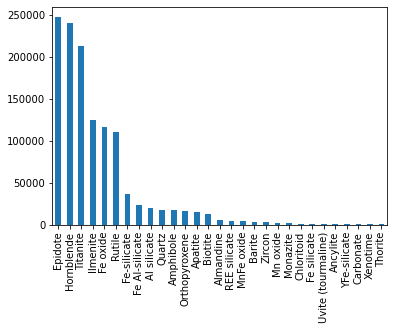

In [11]:
mineralogy_counts = pd.value_counts(train['Mineralogy'].values, sort=True)
mineralogy_counts.plot.bar()

### Data Cleaning

In [12]:
# Replace 0.5 with 0

# Train
for column in train.columns:
    if column != 'Index' and column != 'x' and column != 'y' and column != 'z' and column != 'Mineralogy':
        train[column] = train[column].replace(0.5, 0)

# Test
for column in test.columns:
    if column != 'Index' and column != 'x' and column != 'y' and column != 'z' and column != 'Mineralogy':
        test[column] = test[column].replace(0.5, 0)

# Val
for column in val.columns:
    if column != 'Index' and column != 'x' and column != 'y' and column != 'z' and column != 'Mineralogy':
        val[column] = val[column].replace(0.5, 0)     

In [13]:
# Delete NA rows from train, leave test and val?
print(len(train))
train_clean = train[train['Mineralogy'].notna()]
train_clean = train[train['z'].notna()]

test_clean = test[test['Mineralogy'].notna()]
test_clean = test[test['z'].notna()]
print(len(train_clean))

#Delete the Index X and Y
train_clean = train_clean.drop('x', axis=1)
train_clean = train_clean.drop('y', axis=1)
train_clean = train_clean.drop('Index', axis=1)

test_clean = test_clean.drop('x', axis=1)
test_clean = test_clean.drop('y', axis=1)
test_clean = test_clean.drop('Index', axis=1)


1239696
1239696


### Naive bayes multiclass classification


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [15]:
x_train = train_clean.iloc[:, :-1]
y_train = train_clean.iloc[:, -1]

x_test = test_clean.iloc[:, :-1]
y_test = test_clean.iloc[:, -1]

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Building the model 

In [21]:
classifer = GaussianNB()

In [23]:
classifer.fit(x_train, y_train)
y_pred = classifer.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.44022847010858823


In [24]:
# model evaluation
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


<AxesSubplot:>

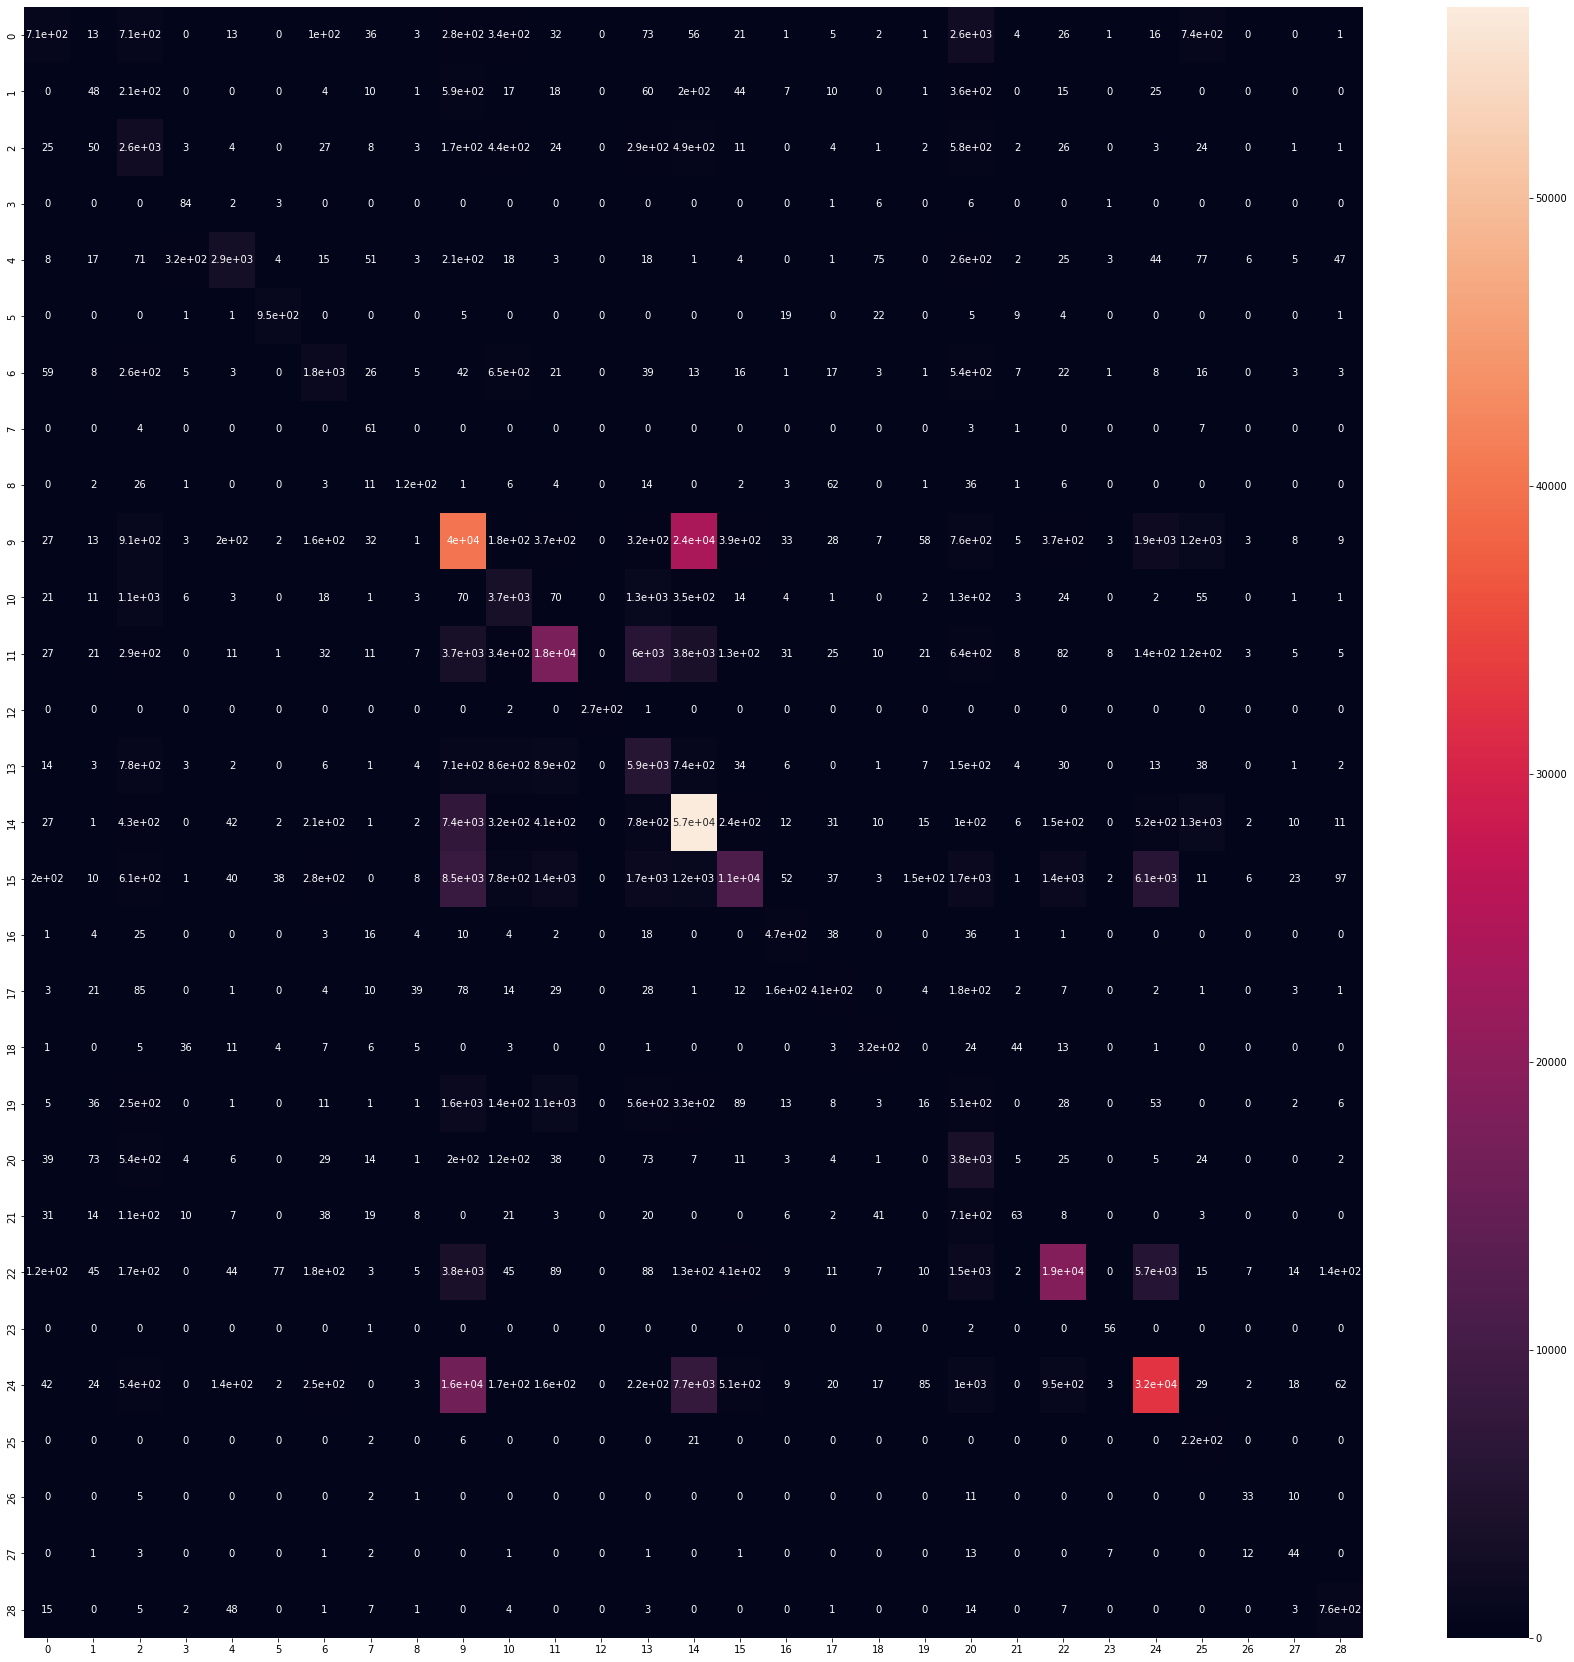

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True)


In [26]:
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

       Al silicate       0.52      0.12      0.20      5776
         Almandine       0.12      0.03      0.05      1617
         Amphibole       0.27      0.55      0.36      4832
          Ancylite       0.17      0.82      0.29       103
           Apatite       0.84      0.69      0.76      4192
            Barite       0.88      0.93      0.90      1017
           Biotite       0.56      0.50      0.53      3540
         Carbonate       0.18      0.80      0.30        76
        Chloritoid       0.52      0.40      0.45       296
           Epidote       0.48      0.56      0.52     71216
    Fe Al-silicate       0.45      0.54      0.49      6903
          Fe oxide       0.79      0.53      0.63     33080
       Fe silicate       1.00      0.99      0.99       275
       Fe-silicate       0.34      0.58      0.43     10246
        Hornblende       0.59      0.82      0.69     68711
          Ilmenite       0.86      0.32